In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [16]:
img = cv.imread(cv.samples.findFile("us.jpg"))

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

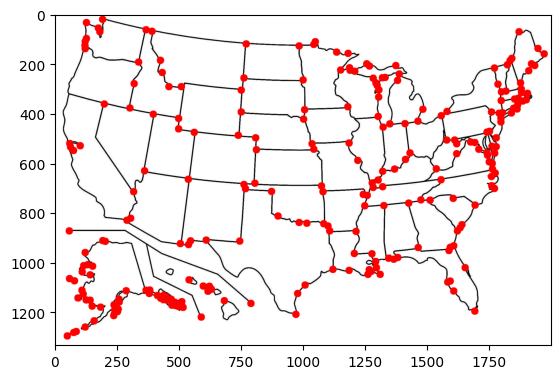

In [18]:
corners = cv.goodFeaturesToTrack(gray, 250, 0.01, 10)
corners = np.int0(corners)

imgcorners = img.copy()
for i in corners:
    x, y = i.ravel()
    cv.circle(imgcorners, (x,y), 15, 255, -1)
    
plt.imshow(imgcorners)
plt.show()

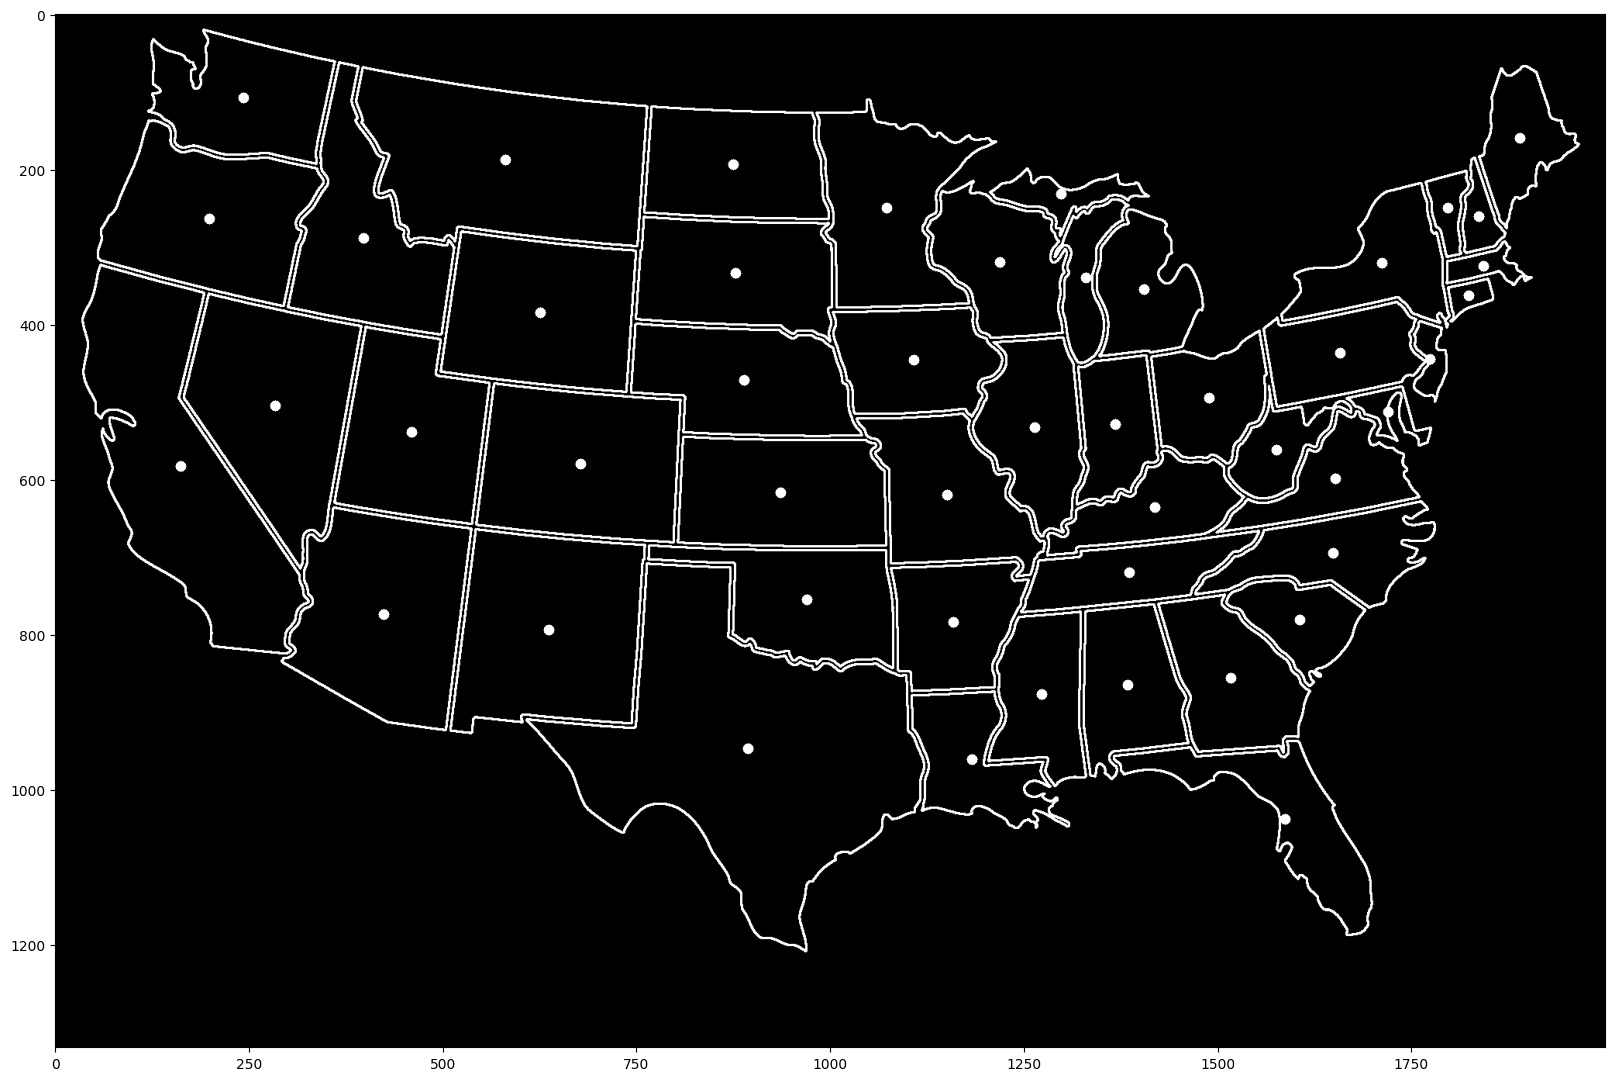

In [127]:
ret, thresh = cv.threshold(gray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

blank = np.zeros(thresh.shape[:2], dtype='uint8')

remove_extra = contours[42:]

for i in remove_extra:
    if (cv.contourArea(i) / (blank.shape[0] * blank.shape[1])) < 0.0005:
        # filter out small / insignificant regions
        continue
        
    M = cv.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv.drawContours(blank, [i], -1, (255, 255, 255), 2)
        cv.circle(blank, (cx, cy), 7, (255, 255, 255), -1)

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(blank, cmap='gray')
plt.show()

In [107]:
print(max(map(cv.contourArea, remove_extra)) / (blank.shape[0] * blank.shape[1]))

0.04366841710427607
